## Domain: Automobile Project 04: Automobile data 
 
This dataset contains information about cars 
 

 
## Exploration ideas 

1. Loading and cleaningdata.

2. Variable analysis to see its impact on automobile pricing. 

3. Summary Statistics of different variables. 

4. Univariate and bivariate analysis 

5. Make, Curb-weight, Drive wheels analysis. 


In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from CSV file
autodata=pd.read_csv("Automobile_data.txt")

In [132]:
autodata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

## Loading and cleaningdata.

In [133]:
autodata.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [134]:
autodata.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [135]:
pd.to_numeric(autodata['bore'],errors='coerce').isnull().sum()

4

In [136]:
autodata.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [137]:
autodata[autodata.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [138]:
autodata.duplicated().sum()

0

In [139]:
#List of columns that contain a "?" for missing data
colslist = list(autodata.columns)
for col in colslist:
    if('?' in autodata[col].value_counts()):
        print(col + " - " + str(autodata[col].value_counts()['?']))

normalized-losses - 41
num-of-doors - 2
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


## Following columns will need to be sanitized, before they can be used for analysis.
1. normalized-losses

2. price

3. horsepower 

4. bore

5. stroke

## 1. normalized-losses - Data Cleaning

In [140]:
#Replace non-numeric characters in normalized-losses column with NaN by using errors='coerce' .

carsnl=autodata
carsnl['normalized-losses'] = pd.to_numeric(carsnl['normalized-losses'],errors='coerce')
carsnl['normalized-losses'].head()

0      NaN
1      NaN
2      NaN
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

In [141]:
#Find makes having normalized-losses as NaNs and their number of occurrances 

carsnan=carsnl[carsnl['normalized-losses'].isnull()].groupby(by='make', as_index=False).size().reset_index()
carsnan.columns=['make','nanscount']
carsnan

,make,nanscount
0,alfa-romero,3
1,audi,3
2,bmw,4
3,isuzu,4
4,jaguar,2
5,mazda,2
6,mercedes-benz,3
7,mercury,1
8,mitsubishi,3
9,peugot,4


In [142]:
#Find makes with count of all records under each make
carsgp = carsnl.groupby(by='make',as_index=False).size().reset_index()
carsgp.columns=['make','makecount']
carsgpnan=carsgp.merge(carsnan,on="make", how="left", suffixes=['', '_right'])
carsgpnan

,make,makecount,nanscount
0,alfa-romero,3,3.0
1,audi,7,3.0
2,bmw,8,4.0
3,chevrolet,3,NaN
4,dodge,9,NaN
5,honda,13,NaN
6,isuzu,4,4.0
7,jaguar,3,2.0
8,mazda,17,2.0
9,mercedes-benz,8,3.0


In [143]:
#Find makes having more than 50% records with valid normalized-losses values
mean_nan_makes = carsgpnan[carsgpnan['nanscount']*100/carsgpnan['makecount'] <= 50].reset_index()
mean_nan_makes['nlimpute']=mean_nan_makes['make']
mean_nan_makes

,index,make,makecount,nanscount,nlimpute
0,1,audi,7,3.0,audi
1,2,bmw,8,4.0,bmw
2,8,mazda,17,2.0,mazda
3,9,mercedes-benz,8,3.0,mercedes-benz
4,11,mitsubishi,13,3.0,mitsubishi
5,13,peugot,11,4.0,peugot
6,14,plymouth,7,1.0,plymouth
7,19,toyota,32,1.0,toyota
8,20,volkswagen,12,4.0,volkswagen


In [144]:
#Find mean loss figures for those makes
nlcars=carsnl.merge(mean_nan_makes, on="make", how="left", suffixes=['','_right'])
nlmean_by_make = nlcars.groupby(by='nlimpute')['normalized-losses'].mean().reset_index()
nlmean_by_make

,nlimpute,normalized-losses
0,audi,161.000000
1,bmw,190.000000
2,mazda,123.933333
3,mercedes-benz,102.800000
4,mitsubishi,146.200000
5,peugot,161.000000
6,plymouth,129.000000
7,toyota,110.290323
8,volkswagen,121.250000


In [145]:
#Replace NaN values with the calculated mean 

carsr=carsnl.merge(nlmean_by_make, how="left", left_on="make", right_on="nlimpute", suffixes=['', '_right'])
carsr.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,nlimpute,normalized-losses_right
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,NaN,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,NaN,NaN
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,NaN,NaN
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,161.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,161.0


In [146]:
carsr['normalized-losses'] = np.where(carsr['normalized-losses'].isnull(), carsr['normalized-losses_right'], carsr['normalized-losses'])          
#carsnl=False
carsr.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,nlimpute,normalized-losses_right
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,NaN,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,NaN,NaN
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,NaN,NaN
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,161.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,161.0


In [147]:
#carsnl=False

cars = carsr.loc[carsr['normalized-losses'].isnull()==False].copy()

print("Column normalized-losses has " + str(cars['normalized-losses'].count()) + " values after sanitizing")

Column normalized-losses has 189 values after sanitizing


## 2. Price

Calculate the average price per make and impute the missing price values with the respective make's average price. 

In [148]:
cars['price'] = pd.to_numeric(cars['price'],errors='coerce')
mean_price_by_make = cars.groupby(by=['make'])['price'].mean()
mean_price_by_make = mean_price_by_make.reset_index()

mean_price_by_make 


,make,price
0,audi,17859.166667
1,bmw,26118.750000
2,chevrolet,6007.000000
3,dodge,7875.444444
4,honda,8184.692308
5,jaguar,32250.000000
6,mazda,10652.882353
7,mercedes-benz,33647.000000
8,mitsubishi,9239.769231
9,nissan,10415.666667


In [149]:
# Merge mean_price_by_make (Rigt) with cars dataframe (Left)

cars = cars.merge(mean_price_by_make,on='make', suffixes=['', '_right'])
cars['price'] = np.where(cars['price'].isnull(), cars['price_right'], cars['price'])
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,nlimpute,normalized-losses_right,price_right
0,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.00,102,5500,24,30,13950.000000,audi,161.000000,17859.166667
1,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.00,115,5500,18,22,17450.000000,audi,161.000000,17859.166667
2,2,161.000000,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.50,110,5500,19,25,15250.000000,audi,161.000000,17859.166667
3,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.50,110,5500,19,25,17710.000000,audi,161.000000,17859.166667
4,1,161.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.50,110,5500,19,25,18920.000000,audi,161.000000,17859.166667
5,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.30,140,5500,17,20,23875.000000,audi,161.000000,17859.166667
6,0,161.000000,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.00,160,5500,16,22,17859.166667,audi,161.000000,17859.166667
7,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,2.80,8.80,101,5800,23,29,16430.000000,bmw,190.000000,26118.750000
8,0,192.000000,bmw,gas,std,four,sedan,rwd,front,101.2,...,2.80,8.80,101,5800,23,29,16925.000000,bmw,190.000000,26118.750000
9,0,188.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.19,9.00,121,4250,21,28,20970.000000,bmw,190.000000,26118.750000


## 3. Horsepower

Convert to numeric


In [150]:
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors="coerce")

In [151]:
cars['horsepower'].isnull().sum()

0

Drop all temporary columns that were added/merged in the process of data cleansing

In [152]:
del cars['normalized-losses_right']
del cars['price_right']

Remove records having number of doors as "?"

In [153]:
cars = cars[cars['num-of-doors'] != '?']

In [154]:
cars['num-of-doors']

0      four
1      four
2       two
3      four
4      four
5      four
6       two
7       two
8      four
9       two
10     four
11     four
12     four
13      two
14     four
15      two
16      two
17     four
18      two
19      two
20      two
21     four
22     four
23     four
25     four
26      two
27      two
28      two
29      two
30      two
       ... 
159    four
160    four
161    four
162     two
163     two
164    four
165    four
166     two
167     two
168    four
169    four
170    four
171    four
172    four
173     two
174     two
175    four
176    four
177    four
178    four
179    four
180    four
181    four
182    four
183    four
184    four
185    four
186    four
187    four
188    four
Name: num-of-doors, Length: 187, dtype: object

## Integer encode Text Columns - Convert to ordinal values¶

Following columns are converted to numeric, by interpreting the string values:
    
    1.num-of-doors
    
    2.num-of-cylinders

In [155]:
# num-of-doors to numeric

def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0
       
cars['num_doors'] = cars['num-of-doors'].apply(lambda x: calc_num_doors (x))

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [156]:
cars['num_doors'].head()

0    4
1    4
2    2
3    4
4    4
Name: num_doors, dtype: int64

In [157]:
# num-of-cylinders to numeric

def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

cars['num_cylinders'] = cars['num-of-cylinders'].apply(lambda x: calc_num_cylinders(x))

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [158]:
cars['num_cylinders'].head()

0    4
1    5
2    5
3    5
4    5
Name: num_cylinders, dtype: int64

## Derive columns

    .Convert the Engine size from cubic inches to cubic centimeters (cc) for easier understanding. To convert cubic inch to cubic centimeter, divide cubic inch value by 0.061024

    .Calculate power to weight ratio of vehicles. Power to weight ratio shows the performance of a car

In [159]:
cars['engine_size_cc'] = cars['engine-size'].apply(lambda x: int(x/0.061024))
cars['power2weight_ratio'] = pd.to_numeric(cars['horsepower'], errors="coerce")/cars['curb-weight']

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
cars['engine_size_cc'].head()

0    1786
1    2228
2    2228
3    2228
4    2228
Name: engine_size_cc, dtype: int64

In [161]:
cars['engine_size_cc'].head()

0    1786
1    2228
2    2228
3    2228
4    2228
Name: engine_size_cc, dtype: int64

## Remove rows having non-numeric bore and stroke

In [162]:
cars = cars[cars['bore'] != '?']
cars = cars[cars['stroke'] != '?']
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power2weight_ratio
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.737705,124.274446,99.145355,174.287978,65.909836,54.009836,2542.054645,125.196721,10.185355,100.295082,25.666667,31.098361,12709.858834,3.202186,4.349727,2051.038251,0.038940
std,1.207599,35.718009,5.979826,12.574952,2.116007,2.328635,518.033610,37.826884,4.078702,33.713080,6.338729,6.813138,7438.115517,0.982034,0.843910,619.911154,0.007719
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,48.000000,14.000000,16.000000,5118.000000,2.000000,3.000000,999.000000,0.019936
25%,0.000000,95.000000,94.500000,166.300000,64.000000,52.500000,2128.000000,97.500000,8.500000,70.000000,20.500000,25.000000,7649.000000,2.000000,4.000000,1597.000000,0.034139
50%,1.000000,119.000000,97.200000,173.400000,65.500000,54.300000,2405.000000,110.000000,9.000000,94.000000,25.000000,31.000000,9988.000000,4.000000,4.000000,1802.000000,0.037475
75%,2.000000,153.000000,102.400000,184.600000,66.900000,55.700000,2964.500000,141.000000,9.400000,116.000000,30.500000,36.500000,16214.000000,4.000000,4.000000,2310.000000,0.043704
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,23.000000,200.000000,49.000000,54.000000,45400.000000,4.000000,8.000000,5047.000000,0.063715


## Check if any column has ?

In [163]:
colslist = list(cars.columns)
for col in colslist:
    if('?' in cars[col].value_counts()):
        print(col + " - " + str(autodata[col].value_counts()['?']))

## Replace Drive-wheels with descriptive values


In [164]:
cars.loc[cars['drive-wheels']=='4wd', 'drive-wheels']='Four Wheel Drive'
cars.loc[cars['drive-wheels']=='fwd', 'drive-wheels']='Front Wheel Drive'
cars.loc[cars['drive-wheels']=='rwd', 'drive-wheels']='Rear Wheel Drive'

In [165]:
cars['drive-wheels'].head()

0    Front Wheel Drive
1     Four Wheel Drive
2    Front Wheel Drive
3    Front Wheel Drive
4    Front Wheel Drive
Name: drive-wheels, dtype: object

## Store Cleaned data to CSV file

In [166]:
cars.to_csv('cardata_cleaned.csv')

## Automobile Dataset - Univariate Analysis

## Load cleansed and prepared data
The original automobile data set has been put through data wrangling, cleansing etc. and has been stored as cardata_cleaned.csv. This sheet loads the cleaned up data for analysis. 

In [167]:
cars=pd.read_csv("./cardata_cleaned.csv")

In [168]:
cars.isnull().sum()

Unnamed: 0             0
symboling              0
normalized-losses      0
make                   0
fuel-type              0
aspiration             0
num-of-doors           0
body-style             0
drive-wheels           0
engine-location        0
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
engine-type            0
num-of-cylinders       0
engine-size            0
fuel-system            0
bore                   0
stroke                 0
compression-ratio      0
horsepower             0
peak-rpm               0
city-mpg               0
highway-mpg            0
price                  0
nlimpute              73
num_doors              0
num_cylinders          0
engine_size_cc         0
power2weight_ratio     0
dtype: int64

## Summary of Variables

In [169]:
cars.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num_doors,num_cylinders,engine_size_cc,power2weight_ratio
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,95.617486,0.737705,124.274446,99.145355,174.287978,65.909836,54.009836,2542.054645,125.196721,3.319180,...,10.185355,100.295082,5095.628415,25.666667,31.098361,12709.858834,3.202186,4.349727,2051.038251,0.038940
std,54.820247,1.207599,35.718009,5.979826,12.574952,2.116007,2.328635,518.033610,37.826884,0.266755,...,4.078702,33.713080,469.635718,6.338729,6.813138,7438.115517,0.982034,0.843910,619.911154,0.007719
min,0.000000,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,...,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000,2.000000,3.000000,999.000000,0.019936
25%,50.500000,0.000000,95.000000,94.500000,166.300000,64.000000,52.500000,2128.000000,97.500000,3.150000,...,8.500000,70.000000,4800.000000,20.500000,25.000000,7649.000000,2.000000,4.000000,1597.000000,0.034139
50%,97.000000,1.000000,119.000000,97.200000,173.400000,65.500000,54.300000,2405.000000,110.000000,3.270000,...,9.000000,94.000000,5200.000000,25.000000,31.000000,9988.000000,4.000000,4.000000,1802.000000,0.037475
75%,142.500000,2.000000,153.000000,102.400000,184.600000,66.900000,55.700000,2964.500000,141.000000,3.580000,...,9.400000,116.000000,5500.000000,30.500000,36.500000,16214.000000,4.000000,4.000000,2310.000000,0.043704
max,188.000000,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,3.940000,...,23.000000,200.000000,6600.000000,49.000000,54.000000,45400.000000,4.000000,8.000000,5047.000000,0.063715


## Univariate Analysis
Following variables shall be analysed 
* make - text, categorical
* symboling - numeric, categorical, ordinal
* body-style - text, categorical
* num_doors - numeric, categorical, ordinal (derived from num-doors)
* drive-wheels - text, categorical
* normalized-losses - numeric, continuous
* wheel-base - numeric, continuous
* height - numeric, continuous
* engine_size_cc - numeric, continuous (derived from engine-size)
* bore - numeric, continuous
* stroke - numeric, continuous
* horsepower - numeric, continuous
* city-mpg - numeric, continuous
* price - numeric, continuous
* num_cylinders - numeric, categorical, ordinal (derived from num-of-cylinders)
* curb-weight - numeric, continuous

In [170]:
#common charting parameters
plot_color = "#dd0033"
title_color = "#333333"
y_title_margin = 1.0 # The amount of space above titles
left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.5    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.6 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.set_style("whitegrid") #set seaborn style template

<Figure size 432x288 with 0 Axes>

## Make

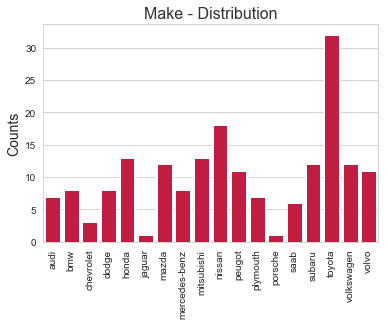

In [171]:
make_hist=sns.countplot(cars['make'], color=plot_color)
make_hist.set_xticklabels(make_hist.get_xticklabels(), rotation=90)
make_hist.set_xlabel('')
make_hist.set_ylabel('Counts', fontsize=14)

ax = make_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Make - Distribution', fontsize=16, color="#333333")
fig = make_hist.get_figure()
fig.figsize=(10,5)
fig.patch.set_alpha(0.5)
fig.savefig('01make_distribution.png',dpi=fig.dpi,bbox_inches='tight')

Toyota has the highest number of models, compared to other manufacturers. 

### Symboling and Normalized Losses

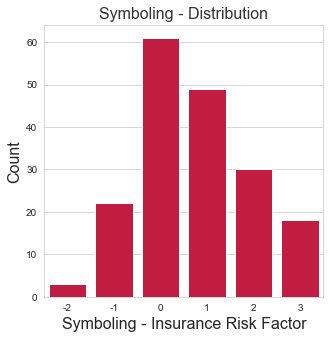

In [172]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

fig.patch.set_alpha(0.5)
ax.set_title("Symboling - Distribution", y = y_title_margin, color=title_color,fontsize=16)

#Set transparency for individual subplots.
ax.patch.set_alpha(0.5)

symbol_hist=sns.countplot(cars["symboling"], color=plot_color, ax=ax )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
symbol_hist.set_ylabel('Count',fontsize=16 )
symbol_hist.set_xlabel('Symboling - Insurance Risk Factor',fontsize=16)

#plt.show()
fig.savefig('02symboling_distribution.png',dpi=fig.dpi,bbox_inches='tight')

Above chart shows how the symboling values are distributed across the data set. -3 is least risky, while +3 is most risky vehicle. majority of car models fall on the riskier side.

### Body Style, Number of Doors and Drive Wheels

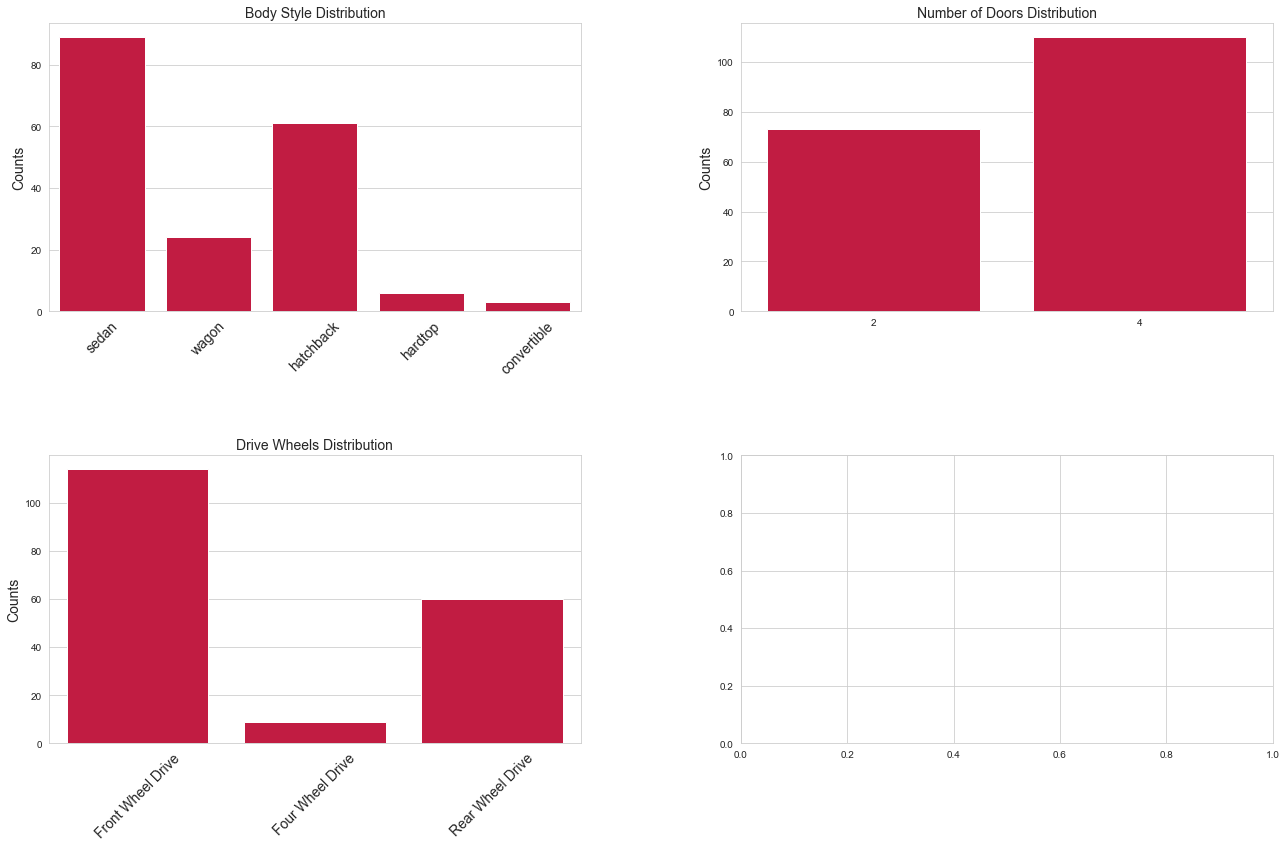

In [173]:
plot_color = "#dd0033"
title_color = "#333333"

fig, ax = plt.subplots(figsize=(20,20), ncols=2, nrows=2)

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.3, 
    hspace  =  0.5
)

fig.patch.set_alpha(0.5)

ax[0][0].set_title('Body Style Distribution', fontsize=14)
ax[0][0].set_alpha(0)

bstyle_dist=sns.countplot(cars['body-style'],color=plot_color, ax=ax[0][0])
bstyle_dist.set_xticklabels(bstyle_dist.get_xticklabels(),rotation=45, fontsize=14)
bstyle_dist.set_xlabel('')
bstyle_dist.set_ylabel('Counts', fontsize=14)

ax[0][1].set_title('Number of Doors Distribution', fontsize=14)
ax[0][1].set_alpha(0)

numdoors_dist=sns.countplot(cars['num_doors'],color=plot_color, ax=ax[0][1])
numdoors_dist.set_xlabel('')
numdoors_dist.set_ylabel('Counts', fontsize=14)

ax[1][0].set_title('Drive Wheels Distribution', fontsize=14)
ax[1][0].set_alpha(0)

drvwheels_dist=sns.countplot(cars['drive-wheels'],color=plot_color, ax=ax[1][0])
drvwheels_dist.set_xticklabels(drvwheels_dist.get_xticklabels(),rotation=45, fontsize=14)
drvwheels_dist.set_xlabel('')
drvwheels_dist.set_ylabel('Counts', fontsize=14)

fig.savefig('03categorical_vars_distribution.png',dpi=fig.dpi,bbox_inches='tight')

### normalized-losses

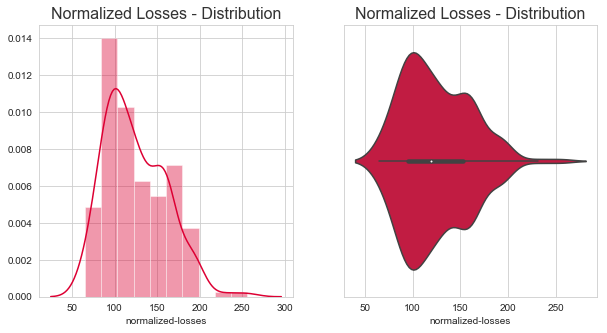

In [174]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Normalized Losses - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

normloss_hist=sns.distplot(cars["normalized-losses"], color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
symbol_hist.set_xlabel('Normalized Losses',fontsize=16)

ax[1].set_title("Normalized Losses - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
normloss_hist=sns.violinplot(cars["normalized-losses"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('04normalized_losses_distribution.png',dpi=fig.dpi,bbox_inches='tight')


In [175]:
cars['normalized-losses'].describe()

count    183.000000
mean     124.274446
std       35.718009
min       65.000000
25%       95.000000
50%      119.000000
75%      153.000000
max      256.000000
Name: normalized-losses, dtype: float64

The violin plot shows an outlier on the higher value side


### wheel-base
Wheel base is the distance between the front and back wheels of a vehicle, measured from axle to axle. A sedan type car normally has a longer wheel base compared to a hatchback. 

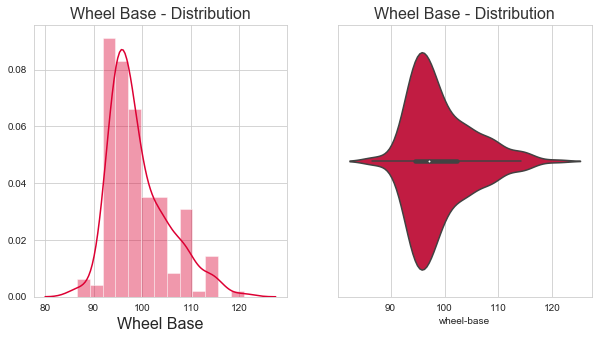

In [176]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Wheel Base - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

wbase_hist=sns.distplot(cars["wheel-base"], hist=True, color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
wbase_hist.set_xlabel('Wheel Base',fontsize=16)

ax[1].set_title("Wheel Base - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
wbase_box=sns.violinplot(cars["wheel-base"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('05wheelbase_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [177]:
cars['wheel-base'].describe()

count    183.000000
mean      99.145355
std        5.979826
min       86.600000
25%       94.500000
50%       97.200000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

* Positively skewed distribution
* Majority of models have their wheel bases on or around the mean. The However, there is a sharp fall-off in the distribution just a little left to the mean value. This indicates that a wheel base shorter than ~93 is very rare.
* The violin plot indicates that there are outliers on the higher side.

### height
Vehicle height is a continuous value. The height plays a significant role in the dynamics of a vehicle.

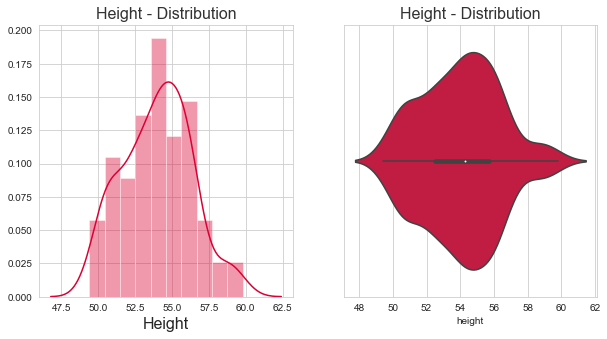

In [178]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Height - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

height_hist=sns.distplot(cars["height"], hist=True, color=plot_color, ax=ax[0] )
height_hist.set_xlabel('Height',fontsize=16)

ax[1].set_title("Height - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
height_box=sns.violinplot(cars["height"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('06height_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [179]:
cars['height'].describe()

count    183.000000
mean      54.009836
std        2.328635
min       49.400000
25%       52.500000
50%       54.300000
75%       55.700000
max       59.800000
Name: height, dtype: float64

Majority car models have their body height around the mean value. However, there is a sharp drop immediately after the mean.This shows there are not many vehicles significantly taller than the median value.

### engine_size_cc
Engine size in cubic centimeters denotes the maximum volume of all cylinders combined. As a general rule, a higher engine size denotes higher volume of fuel+air intake and hence, results in increased power.
*engine_size_cc has been derived from engine-size field, which is in inches.*

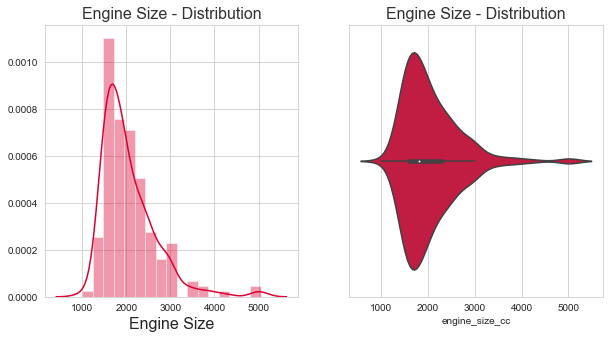

In [180]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Engine Size - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

enginesize_hist=sns.distplot(cars["engine_size_cc"], hist=True, color=plot_color, ax=ax[0] )
enginesize_hist.set_xlabel('Engine Size',fontsize=16)

ax[1].set_title("Engine Size - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
enginesize_box=sns.violinplot(cars["engine_size_cc"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('07enginesize_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [181]:
print("Mode:" + str(cars["engine_size_cc"].mode()))
print(cars["engine_size_cc"].describe())

Mode:0    1507
dtype: int64
count     183.000000
mean     2051.038251
std       619.911154
min       999.000000
25%      1597.000000
50%      1802.000000
75%      2310.000000
max      5047.000000
Name: engine_size_cc, dtype: float64


* The distribution is right (positively) skewed. 
* There is a very high number of smaller sized engines. 1500-2000 cc engines are most common, even though, the mean engine size is 2051 cc.
* There are a few high capacity outlier engines too. 

### bore
The bore is the diameter of the cylinder in which the piston moves. 

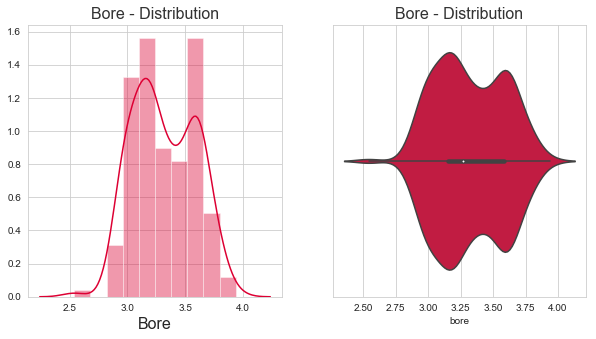

In [182]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Bore - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

bore_hist=sns.distplot(cars["bore"], hist=True, color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
bore_hist.set_xlabel('Bore',fontsize=16)

ax[1].set_title("Bore - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
bore_box=sns.violinplot(cars["bore"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('08bore_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [183]:
print("Mode:" + str(cars["bore"].mode()))
print(cars["bore"].describe())
#cars["bore"].value_counts()

Mode:0    3.62
dtype: float64
count    183.000000
mean       3.319180
std        0.266755
min        2.540000
25%        3.150000
50%        3.270000
75%        3.580000
max        3.940000
Name: bore, dtype: float64


There are two peaks. Bore values tend to concentrate near 3.19 and 3.62.

### stroke
Stroke is the distance travelled by the piston in each cycle. The stroke length - along with bore diameter- determines the engine's displacement (Engine Size).

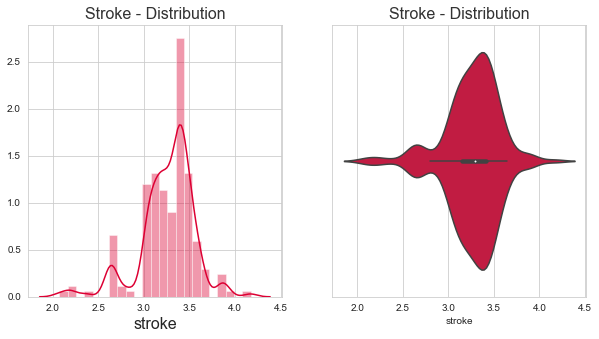

In [184]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Stroke - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

stroke_hist=sns.distplot(cars["stroke"], hist=True, color=plot_color, ax=ax[0] )
stroke_hist.set_xlabel('stroke',fontsize=16)

ax[1].set_title("Stroke - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
stroke_box=sns.violinplot(cars["stroke"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('09stroke_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [185]:
print("Mode:" + str(cars["stroke"].mode()[0]))
print("Median:" + str(cars["stroke"].median()))

print(cars["stroke"].describe())
#cars["stroke"].value_counts()

Mode:3.4
Median:3.29
count    183.000000
mean       3.258962
std        0.305088
min        2.070000
25%        3.150000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


Majority of engine stroke values fall between 3.15 and 3.41. Barring a few outliers, the curve falls off sharply beyond the inter quartile range.

### horsepower
Horsepower of an engine determines how quickly a vehicle can reach top speed from halt. It is a crucial performance parameter of the vehicle

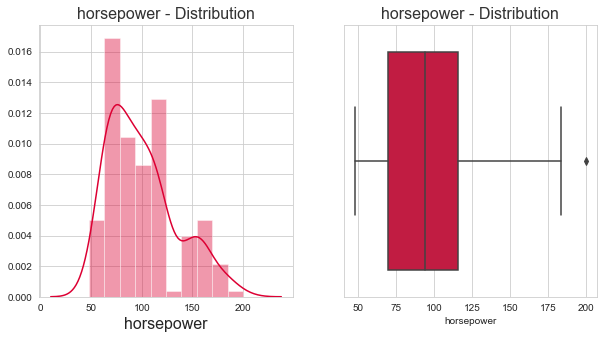

In [186]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("horsepower - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

hp_hist=sns.distplot(cars["horsepower"], hist=True, color=plot_color, ax=ax[0] )
hp_hist.set_xlabel('horsepower',fontsize=16)

ax[1].set_title("horsepower - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(cars["horsepower"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('10horsepower_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [187]:
print("Mode:" + str(cars["horsepower"].mode()[0]))
print("Median:" + str(cars["horsepower"].median()))

print(cars["horsepower"].describe())
#cars["stroke"].value_counts()

Mode:68
Median:94.0
count    183.000000
mean     100.295082
std       33.713080
min       48.000000
25%       70.000000
50%       94.000000
75%      116.000000
max      200.000000
Name: horsepower, dtype: float64


Horsepower shows a positively skewed distribution. Majority of engines tend to have a lower power output within the power range of the dataset.  

### city-mpg
Miles per Gallon shows the fuel efficiency of a vehicle.

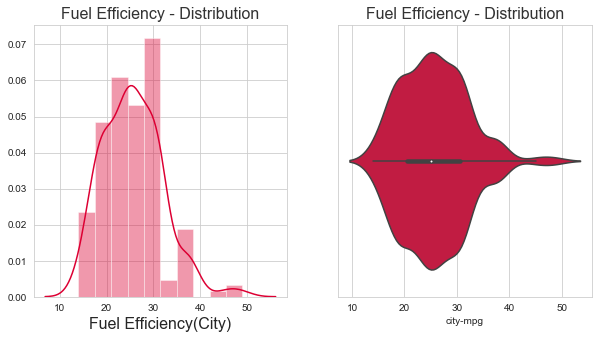

In [188]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Fuel Efficiency - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

citympg_hist=sns.distplot(cars["city-mpg"], hist=True, color=plot_color, ax=ax[0] )
citympg_hist.set_xlabel('Fuel Efficiency(City)',fontsize=16)

ax[1].set_title("Fuel Efficiency - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
citympg_box=sns.violinplot(cars["city-mpg"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('11citympg_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [189]:
print("Mode:" + str(cars["city-mpg"].mode()[0]))
print("Median:" + str(cars["city-mpg"].median()))

print(cars["city-mpg"].describe())
#cars["city-mpg"].value_counts()

Mode:31
Median:25.0
count    183.000000
mean      25.666667
std        6.338729
min       14.000000
25%       20.500000
50%       25.000000
75%       30.500000
max       49.000000
Name: city-mpg, dtype: float64


The FE figures range from 14 mpg and upwards. At 31 mpg, which is what majority cars output, there is a sharp fall, indicating a practical limit on how high the FE figures can go. Although there are a few outliers - nearing 49 mpg.

### price

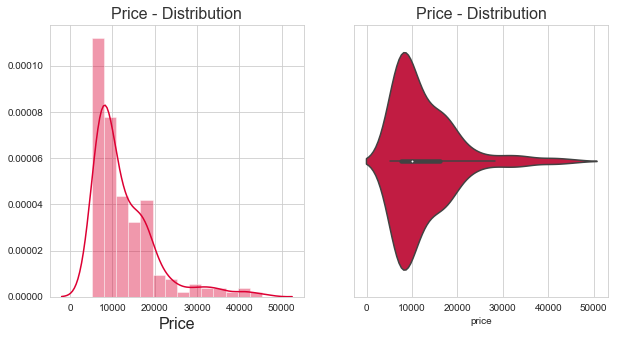

In [190]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Price - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

price_hist=sns.distplot(cars["price"], hist=True, color=plot_color, ax=ax[0] )
price_hist.set_xlabel('Price',fontsize=16)

ax[1].set_title("Price - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
normloss_hist=sns.violinplot(cars["price"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('12price_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [191]:
print("Mode:" + str(cars["price"].mode()[0]))
print("Median:" + str(cars["price"].median()))

print(cars["price"].describe())
#cars["price"].value_counts()

Mode:5572.0
Median:9988.0
count      183.000000
mean     12709.858834
std       7438.115517
min       5118.000000
25%       7649.000000
50%       9988.000000
75%      16214.000000
max      45400.000000
Name: price, dtype: float64


Price shows a positively skewed distriution. Most common car prices are below 10K. There are outliers having prices upwards of 30K.

### num_cylinders
Number of cylinders determines the size of the engine as well as its performance. It is a categorical variable whose values can vary from 3 to 8 for a car engine.

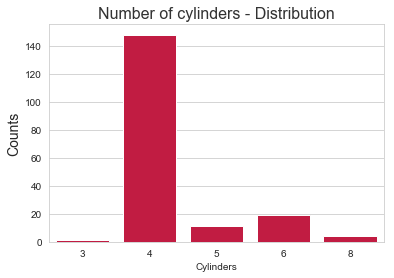

In [192]:
ncyl_hist=sns.countplot(cars['num_cylinders'], color=plot_color)
ncyl_hist.set_xlabel('Cylinders')
ncyl_hist.set_ylabel('Counts', fontsize=14)

ax = ncyl_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Number of cylinders - Distribution', fontsize=16, color="#333333")
fig = ncyl_hist.get_figure()
fig.figsize=(10,5)
fig.patch.set_alpha(0.5)
fig.savefig('13numcylinders_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [193]:
print("Mode:" + str(cars["num_cylinders"].mode()[0]))
print("Median:" + str(cars["num_cylinders"].median()))

print(cars["num_cylinders"].describe())
#cars["num_cylinders"].value_counts()

Mode:4
Median:4.0
count    183.000000
mean       4.349727
std        0.843910
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: num_cylinders, dtype: float64


4 cylinder engines are most common for cars. 

### curb-weight
curb weight or kerb weight is the total weight of a car with all standard equipments. It will include consumables like engine oil, transmission oil, refrigerent, and fuel. It will not include weight of passengers and luggage.

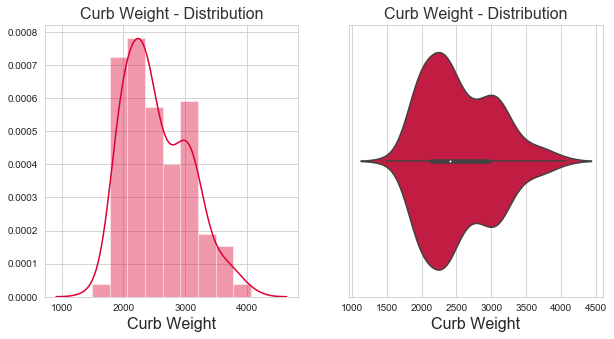

In [194]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Curb Weight - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

cweight_hist=sns.distplot(cars["curb-weight"], hist=True, color=plot_color, ax=ax[0] )
cweight_hist.set_xlabel('Curb Weight',fontsize=16)

ax[1].set_title("Curb Weight - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
cweight_box=sns.violinplot(cars["curb-weight"], color=plot_color, ax=ax[1] )
cweight_box.set_xlabel('Curb Weight',fontsize=16)

#plt.show()
fig.savefig('12curbweight_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [196]:
print("Mode:" + str(cars["curb-weight"].mode()[0]))
print("Median:" + str(cars["curb-weight"].median()))

print(cars["curb-weight"].describe())
#cars["curb-weight"].value_counts()

Mode:1918
Median:2405.0
count     183.000000
mean     2542.054645
std       518.033610
min      1488.000000
25%      2128.000000
50%      2405.000000
75%      2964.500000
max      4066.000000
Name: curb-weight, dtype: float64


### Hypothesis:

Body style, body size and engine specs play an important role in arriving at the market price of a car. 

This study aims to establish the relationship between the said parameters within the scope of the available data. The initial assumption is that aboe factors play a significant role in the price discovery, inspite of market dynamics and its influence.